### TESTING BEST MODELS - MLP vs SVM

**IMPORTS**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import os
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from joblib import dump, load

In [6]:
import os
# code to run in my colab notebook
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/TestingBestModels' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['TestingBestModels-MLP_SVM-HiggsDetection.ipynb', 'MLP_FinalModelwithBestParameters.pkl', 'y_test_data.csv', 'X_test_data.csv', 'SVMClf_Final _model_SVM_Higgs.pkl']


**If running in Google Drive uncomment and run the below code** 



In [ ]:
# If running in Google Drive uncomment and run the below code 

#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/HiggsDetection_NeuralComputing/SavedModels/TestingBestModels'

In [9]:
X_test = pd.read_csv(GOOGLE_DRIVE_PATH + '/X_test_data.csv')
y_test = pd.read_csv(GOOGLE_DRIVE_PATH + '/y_test_data.csv')

### **If running the same in Jupyter Notebook**

run the below cells

In [ ]:
#If running the same in JUPYTER NOTEBOOK uncomment and run this cell

# X_test = pd.read_csv('X_test_data.csv')
# y_test = pd.read_csv('y_test_data.csv')

### MLP Testing

*Test data needs to be scaled and PCA of 27 components needs to be extracted*



In [11]:
BestClassifier_MLP = load(GOOGLE_DRIVE_PATH + '/MLP_FinalModelwithBestParameters.pkl') 

In [ ]:
#If running the same in JUPYTER NOTEBOOK uncomment and run this cell

# BestClassifier_MLP = load('MLP_FinalModelwithBestParameters.pkl') 

In [12]:
scaler_test = StandardScaler()  
scaler_test.fit(X_test)

X_test = scaler_test.transform(X_test)


from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components = 27)

pca.fit(X_test)

X_test = pca.transform(X_test)


y_preds_test = BestClassifier_MLP.predict(X_test)

print('MLP Accuracy on Test data: ')
print(BestClassifier_MLP.score(X_test, y_test))

print('MLP Results for Test data  : ')
print(classification_report(y_test, y_preds_test))

MLP Accuracy on Test data: 
0.5782253952065273
MLP Results for Test data  : 
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      9205
           1       0.59      0.66      0.62     10405

    accuracy                           0.58     19610
   macro avg       0.58      0.57      0.57     19610
weighted avg       0.58      0.58      0.58     19610



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


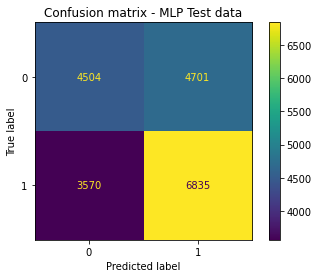

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(BestClassifier_MLP, X_test, y_test)  
plt.title('Confusion matrix - MLP Test data')
plt.show()

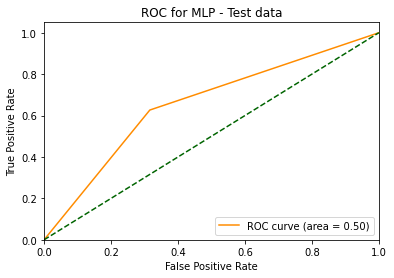

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

MLPTEST_fpr, MLPTEST_tpr, MLPTEST_thresholds = roc_curve(y_preds_test, y_test)
roc_auc_TEST = auc(MLPTEST_fpr, MLPTEST_fpr)

plt.figure()
plt.plot(MLPTEST_fpr, MLPTEST_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc_TEST,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for MLP - Test data")
plt.legend(loc="lower right")
plt.show()


## SVM Testing



In [15]:
BestClassifier_SVM = load(GOOGLE_DRIVE_PATH + '/SVMClf_Final _model_SVM_Higgs.pkl') 

In [ ]:
#If running the same in JUPYTER NOTEBOOK uncomment and run this cell

# BestClassifier_SVM = load('SVMClf_Final _model_SVM_Higgs.pkl') 

In [ ]:
#If running the same in JUPYTER NOTEBOOK uncomment and run this cell

# X_test = pd.read_csv('X_test_data.csv')
# y_test = pd.read_csv('y_test_data.csv')

In [17]:
X_test = pd.read_csv(GOOGLE_DRIVE_PATH + '/X_test_data.csv')
y_test = pd.read_csv(GOOGLE_DRIVE_PATH + '/y_test_data.csv')

In [18]:
y_preds_test = BestClassifier_SVM.predict(X_test)

print('MLP Accuracy on Test data: ')
print(BestClassifier_SVM.score(X_test, y_test))

print('MLP Results for Test data  : ')
print(classification_report(y_test, y_preds_test))

MLP Accuracy on Test data: 
0.644365119836818
MLP Results for Test data  : 
              precision    recall  f1-score   support

           0       0.68      0.45      0.54      9205
           1       0.63      0.82      0.71     10405

    accuracy                           0.64     19610
   macro avg       0.66      0.63      0.63     19610
weighted avg       0.65      0.64      0.63     19610



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


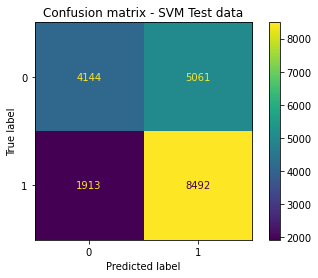

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(BestClassifier_SVM, X_test, y_test)  
plt.title('Confusion matrix - SVM Test data')
plt.show()

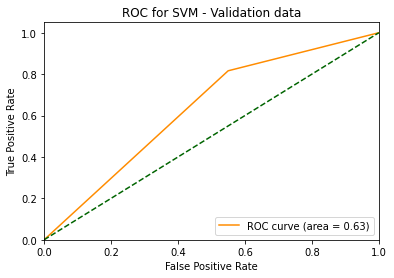

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

SVMTEST_fpr, SVMTEST_tpr, SVMTEST_thresholds = roc_curve(y_test, y_preds_test)
roc_auc = auc(SVMTEST_fpr, SVMTEST_tpr)

plt.figure()
plt.plot(SVMTEST_fpr, SVMTEST_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM - Validation data")
plt.legend(loc="lower right")
plt.show()
